# AAPL Stock Price

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv("AAPL.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


,Date,Close/Last,Volume,Open,High,Low
0,02/14/2025,$244.60,40896230,$241.25,$245.55,$240.99
1,02/13/2025,$241.53,53614050,$236.91,$242.3399,$235.57
2,02/12/2025,$236.87,45243290,$231.20,$236.96,$230.68
3,02/11/2025,$232.62,53718360,$228.20,$235.23,$228.13
4,02/10/2025,$227.65,33115650,$229.57,$230.585,$227.20
...,...,...,...,...,...,...
2511,02/23/2015,$33.25,292357000,$32.505,$33.25,$32.415
2512,02/20/2015,$32.3738,195513640,$32.155,$32.375,$32.0125
2513,02/19/2015,$32.1125,149181840,$32.12,$32.2575,$32.0825
2514,02/18/2015,$32.1788,178783920,$31.9063,$32.195,$31.8625


In [100]:
# Set col name
df.rename(columns={"Close/Last": "Close"}, inplace=True)

# Convert Data type
df["Date"] = pd.to_datetime(df["Date"])

# Use regex to replace $ before convert
df["Close"] = pd.to_numeric(df["Close"].replace(r'[\$,]', '', regex=True))
df["Open"] = pd.to_numeric(df["Open"].replace(r'[\$,]', '', regex=True))
df["High"] = pd.to_numeric(df["High"].replace(r'[\$,]', '', regex=True))
df["Low"] = pd.to_numeric(df["Low"].replace(r'[\$,]', '', regex=True))

df.sort_values(by="Date", ascending=True).reset_index(drop=True)

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


In [101]:
# df.info()
df.describe(include=[int, float]) # View Data Summary

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,98.817013,1.144962e+08,98.723873,99.780063,97.744573
std,66.519845,6.626268e+07,66.437211,67.135674,65.805458
min,22.585000,2.323471e+07,22.500000,22.917500,22.367500
25%,38.476875,7.003828e+07,38.498125,38.709925,38.185625
50%,71.087500,9.826530e+07,70.563750,71.596250,69.883750
75%,155.447500,1.391778e+08,155.157500,157.342500,153.495000
max,259.020000,6.475300e+08,258.190000,260.100000,257.630000


In [102]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df_matrix = df.corr()

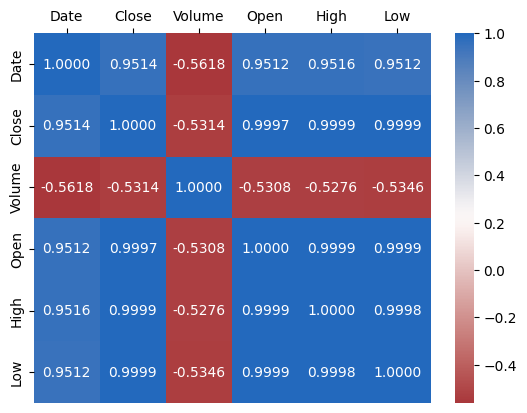

In [105]:
cmap = sns.cm.vlag_r
ax = sns.heatmap(df_matrix, 
            annot=True, 
            cmap=cmap, 
            fmt=".4f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

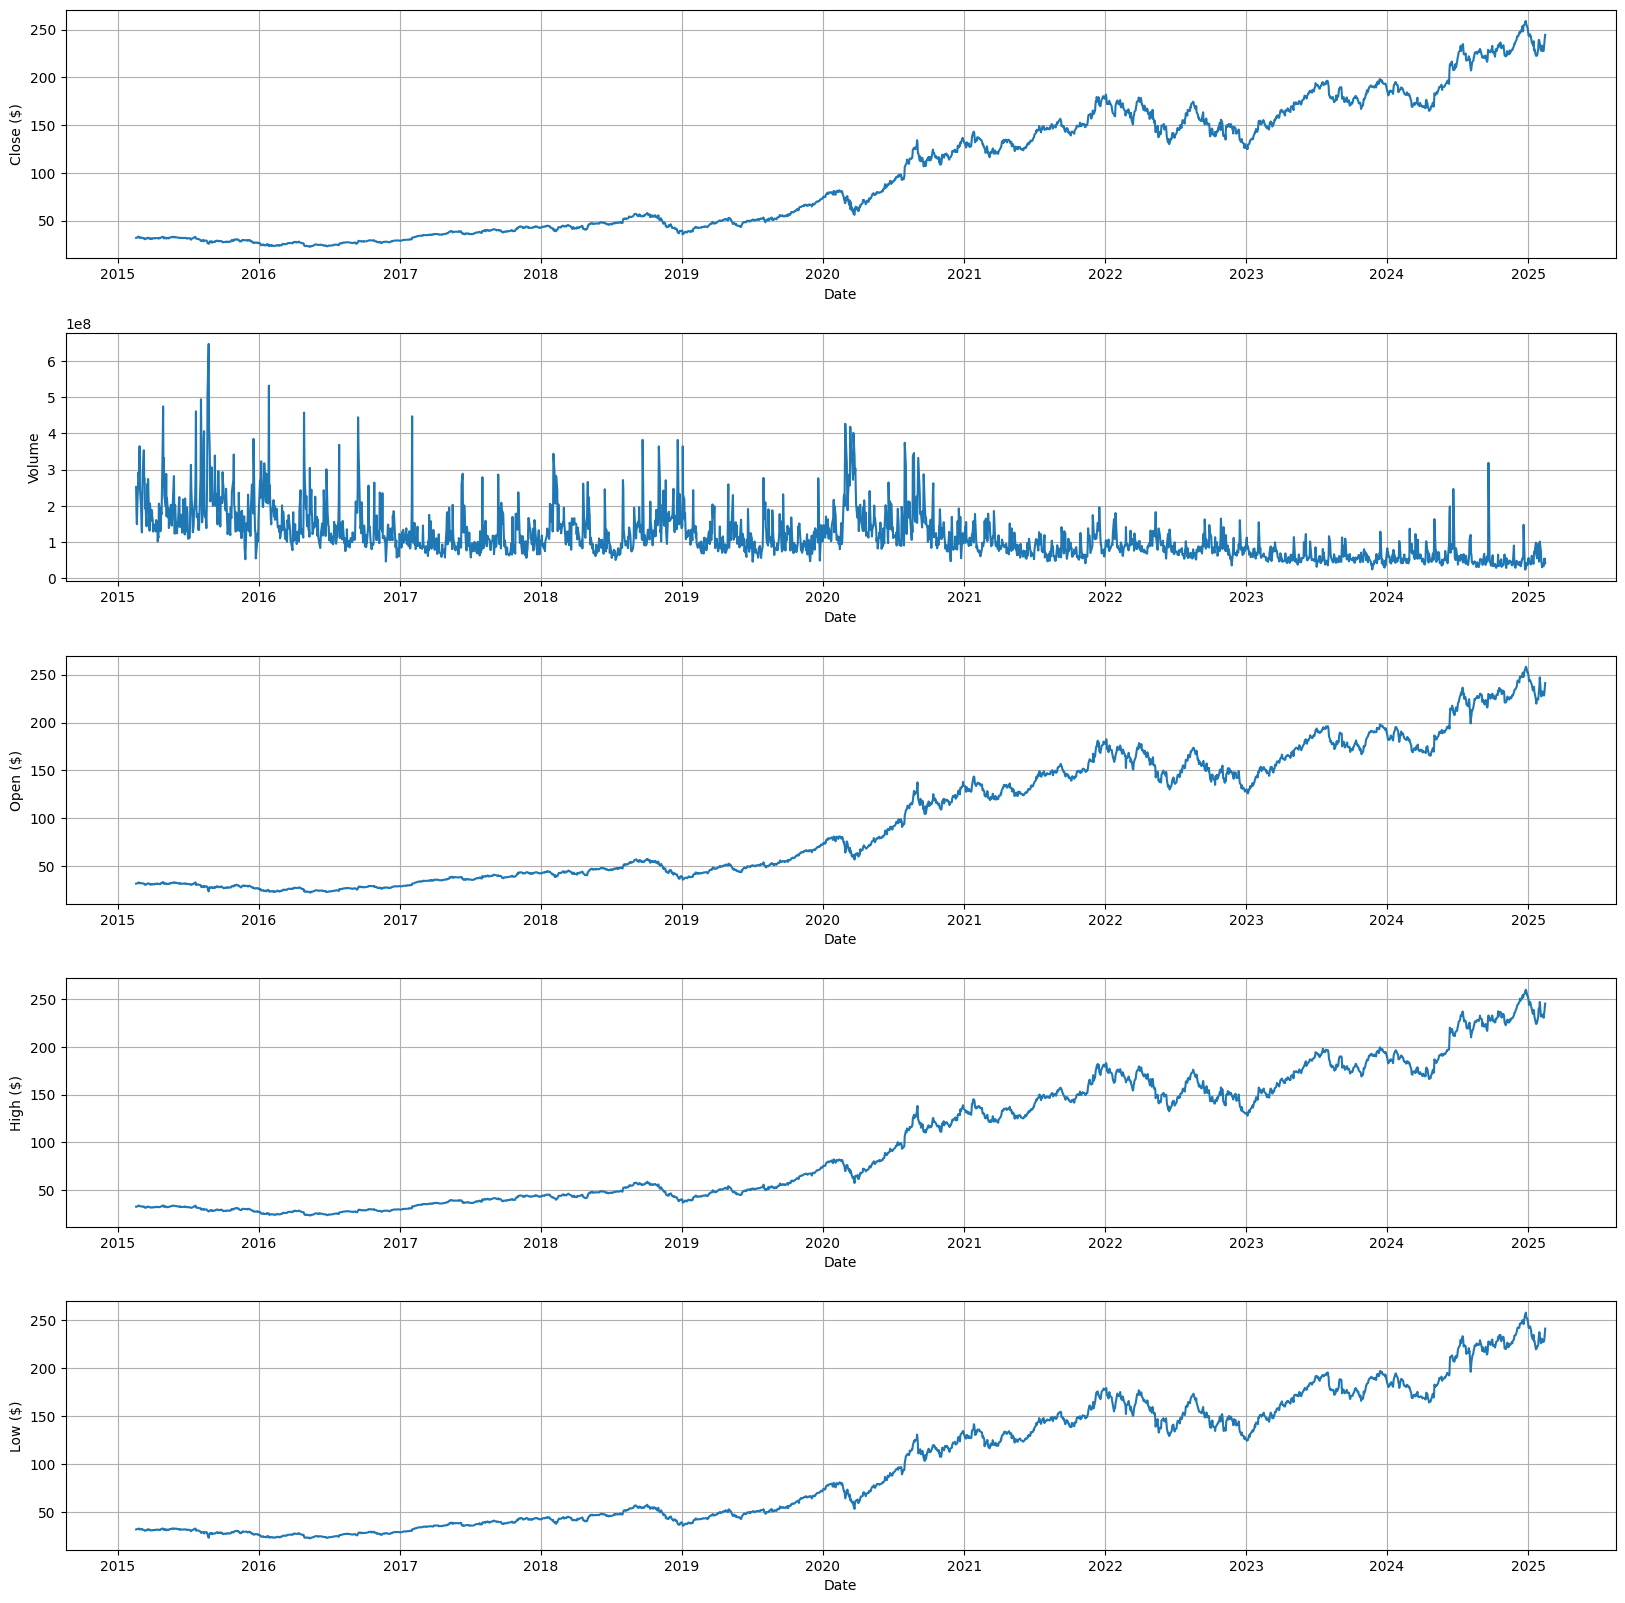

In [106]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 1, 1)
plt.plot(df["Date"], df["Close"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Close ($)")
plt.grid()

plt.subplot(5, 1, 2)
plt.plot(df["Date"], df["Volume"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Volume")
plt.grid()

plt.subplot(5, 1, 3)
plt.plot(df["Date"], df["Open"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Open ($)")
plt.grid()

plt.subplot(5, 1, 4)
plt.plot(df["Date"], df["High"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="High ($)")
plt.grid()

plt.subplot(5, 1, 5)
plt.plot(df["Date"], df["Low"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Low ($)")
plt.grid()

plt.subplots_adjust(hspace=.3)

plt.show()

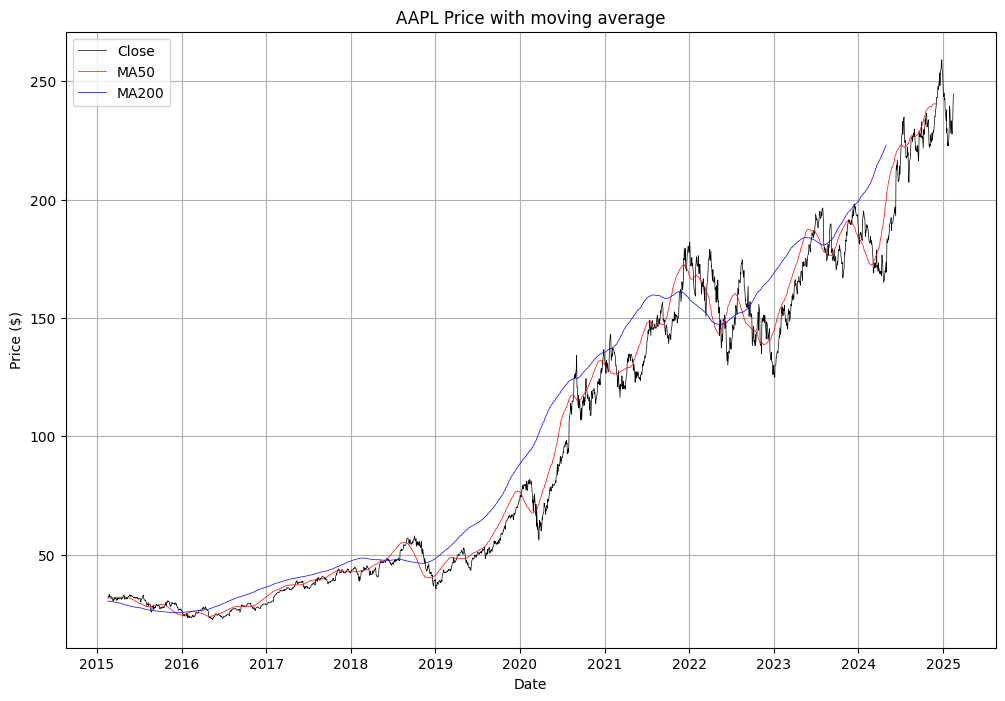

In [107]:
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 8))

plt.plot(df["Date"], df["Close"], color="Black", alpha=1, label="Close", linewidth=0.5)
plt.plot(df["Date"], df["MA50"], color="red", alpha=1, label="MA50", linewidth=0.5)
plt.plot(df["Date"], df["MA200"], color="blue", alpha=1, label="MA200", linewidth=0.5)

plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("AAPL Price with moving average")
plt.legend()
plt.grid()

plt.show()

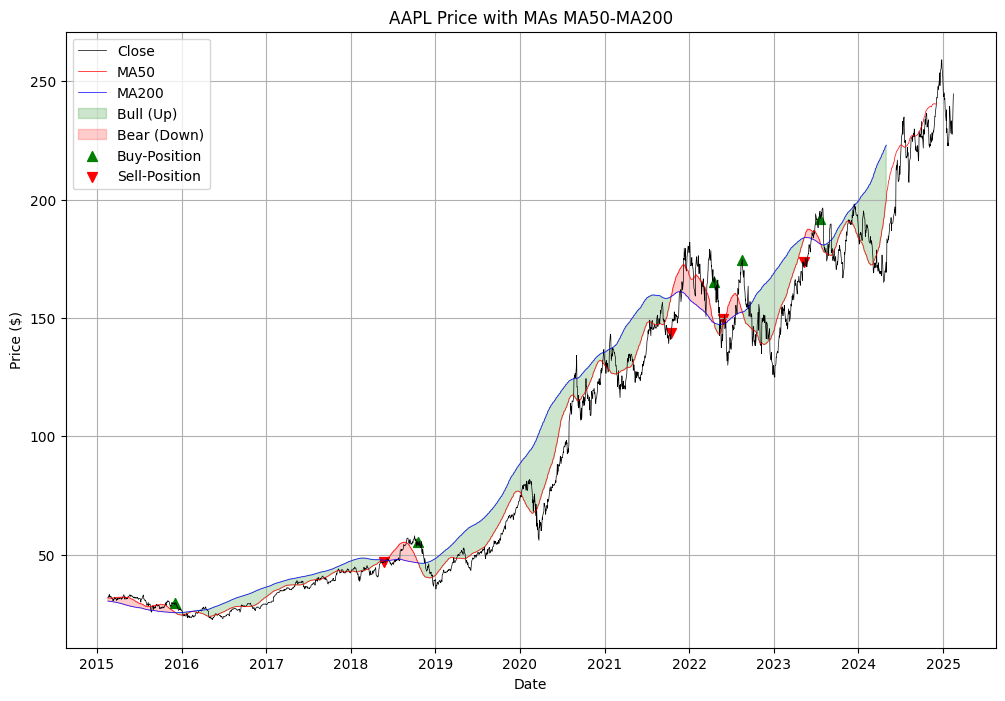

In [108]:
# Simple MA Strategy
plt.figure(figsize=(12, 8))

plt.plot(df["Date"], df["Close"], color="black", linewidth=0.5, label="Close")
plt.plot(df["Date"], df["MA50"], color="red", linewidth=0.5, label="MA50")
plt.plot(df["Date"], df["MA200"], color="blue", linewidth=0.5, label="MA200")

# Fill the colour between
plt.fill_between(df["Date"], df["MA50"], df["MA200"], where=(df["MA50"] < df["MA200"]), color="green", alpha=0.2, label="Bull (Up)")
plt.fill_between(df["Date"], df["MA50"], df["MA200"], where=(df["MA50"] > df["MA200"]), color="red", alpha=0.2, label="Bear (Down)")

# Set Position points
df["Buy"] = (df["MA50"] > df["MA200"]) & (df["MA50"].shift(1) <= df["MA200"].shift(1))
df["Sell"] = (df["MA50"] < df["MA200"]) & (df["MA50"].shift(1) >= df["MA200"].shift(1))

# Visual position point
plt.scatter(df["Date"][df["Buy"]], df["Close"][df["Buy"]], marker="^", color="green", s=50, label="Buy-Position")
plt.scatter(df["Date"][df["Sell"]], df["Close"][df["Sell"]], marker="v", color="red", s=50, label="Sell-Position")

plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("AAPL Price with MAs MA50-MA200")
plt.legend()
plt.grid()
plt.show()


In [109]:
# Create Function

def generateMultipleMASignal(df, fast_periods=[50], slow_periods=[200], size=(12, 8)):
    for fast in fast_periods:
        for slow in slow_periods:
            plt.figure(figsize=size)
            
            df[f"MA{fast}"] = df["Close"].rolling(window=fast).mean()
            df[f"MA{slow}"] = df["Close"].rolling(window=slow).mean()
            
            # Set Position points
            df["Buy"] = (df[f"MA{fast}"] > df[f"MA{slow}"]) & (df[f"MA{fast}"].shift(1) <= df[f"MA{slow}"].shift(1))
            df["Sell"] = (df[f"MA{fast}"] < df[f"MA{slow}"]) & (df[f"MA{fast}"].shift(1) >= df[f"MA{slow}"].shift(1))
            
            # Fill the colour between
            plt.fill_between(df["Date"], df[f"MA{fast}"], df[f"MA{slow}"], where=(df[f"MA{fast}"] < df[f"MA{slow}"]), color="green", alpha=0.2, label="Bull (Up)")
            plt.fill_between(df["Date"], df[f"MA{fast}"], df[f"MA{slow}"], where=(df[f"MA{fast}"] > df[f"MA{slow}"]), color="red", alpha=0.2, label="Bear (Down)")
            
            # Visual position point  
            plt.scatter(df["Date"][df["Buy"]], df["Close"][df["Buy"]], marker="^", color="green", s=50, label="Buy-Position")
            plt.scatter(df["Date"][df["Sell"]], df["Close"][df["Sell"]], marker="v", color="red", s=50, label="Sell-Position")
            
            plt.plot(df["Date"], df["Close"], color="black", linewidth=0.5, label="Close")
            plt.plot(df["Date"], df[f"MA{fast}"], color="red", linewidth=0.5, label=f"MA{fast}")
            plt.plot(df["Date"], df[f"MA{slow}"], color="blue", linewidth=0.5, label=f"MA{slow}")

            plt.xlabel("Date")
            plt.ylabel("Price ($)")
            plt.title(f"AAPL Price with MAs MA{fast}-MA{slow}")
            plt.legend()
            plt.grid()
            plt.show()
    
    return


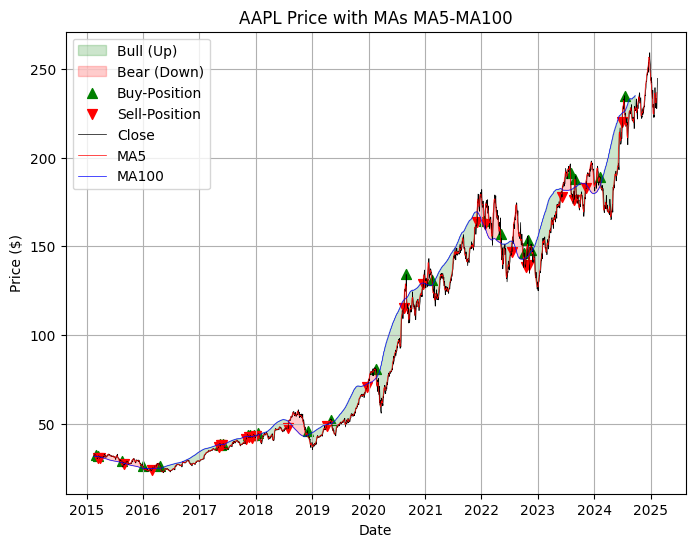

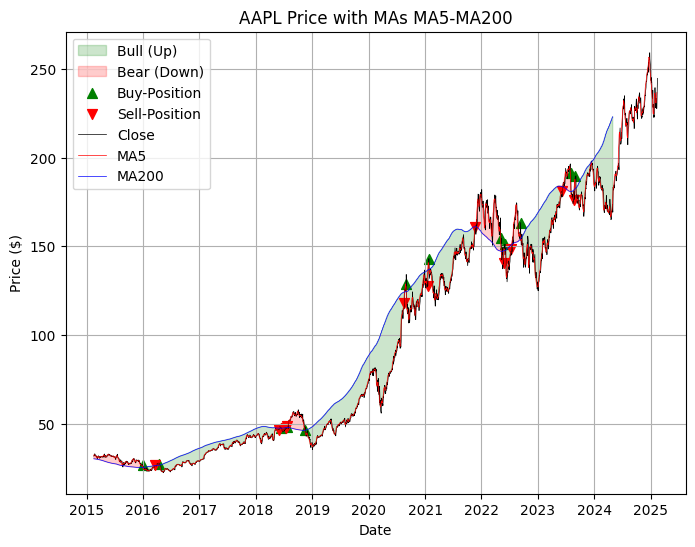

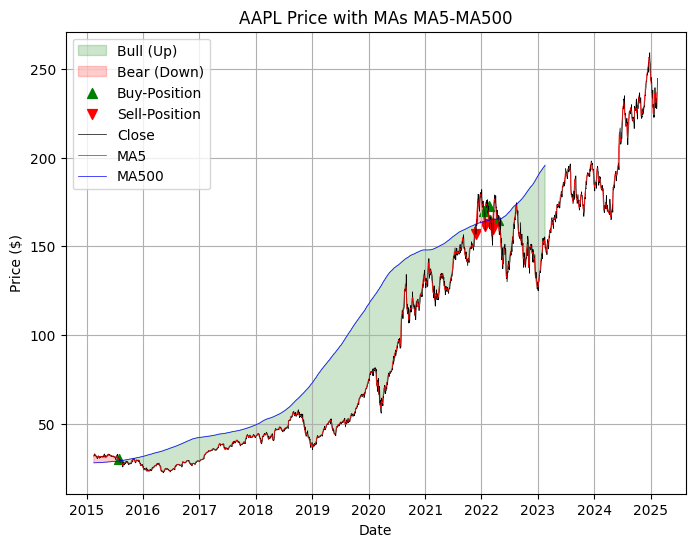

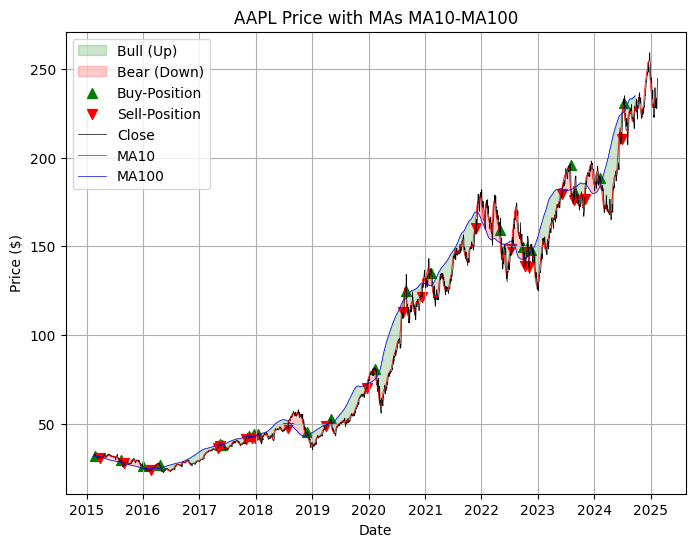

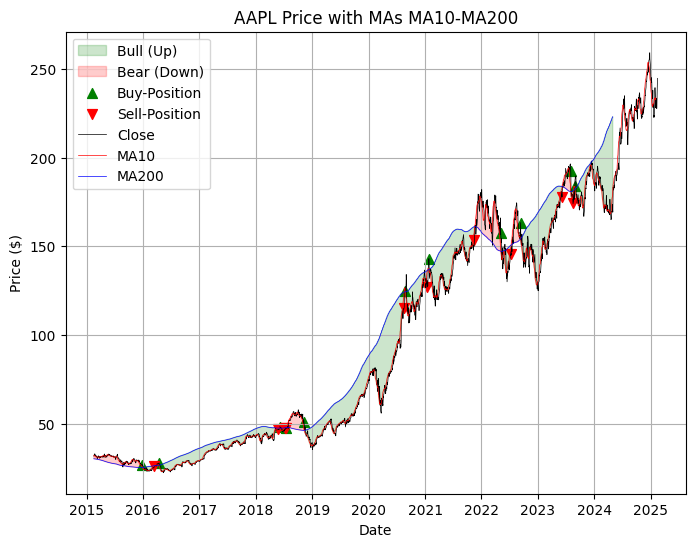

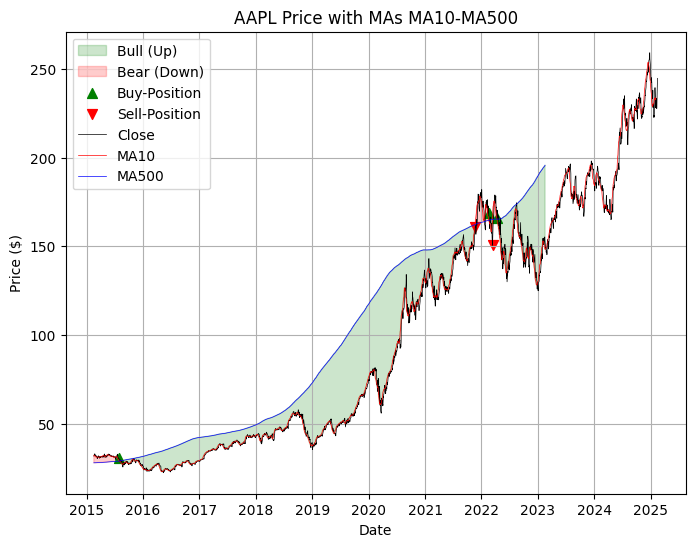

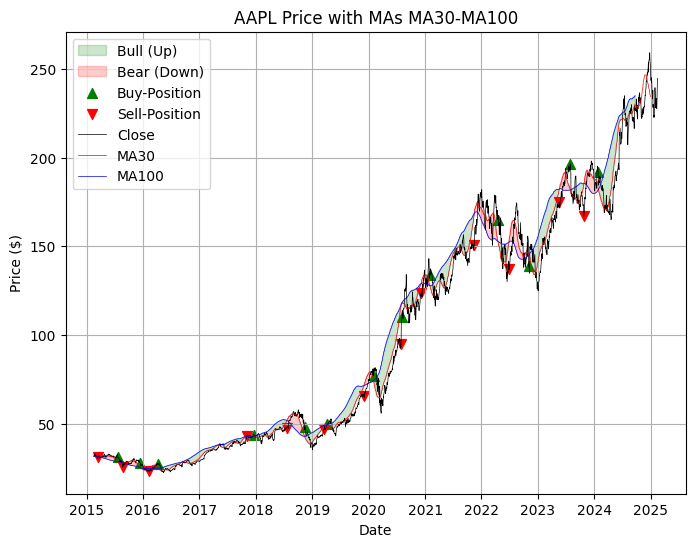

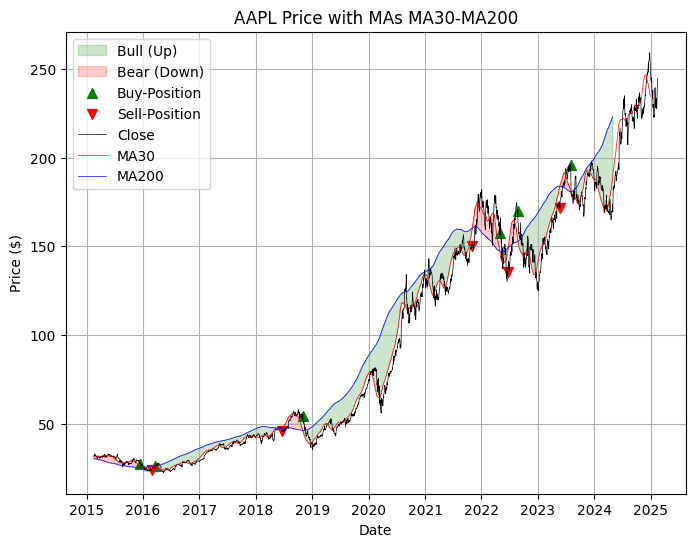

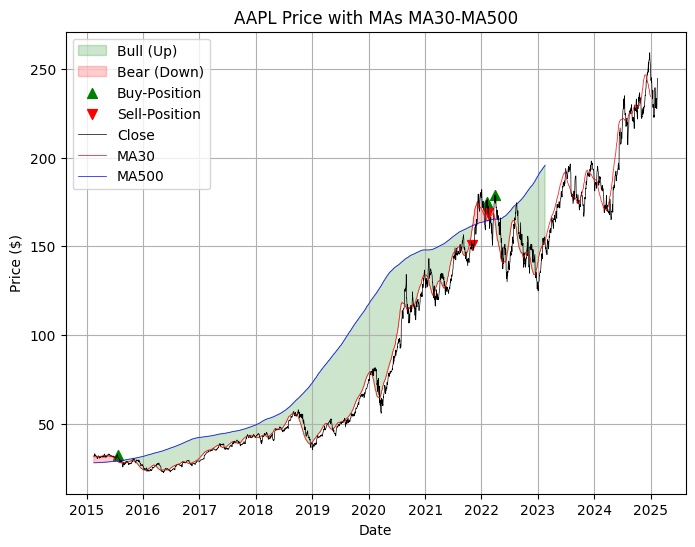

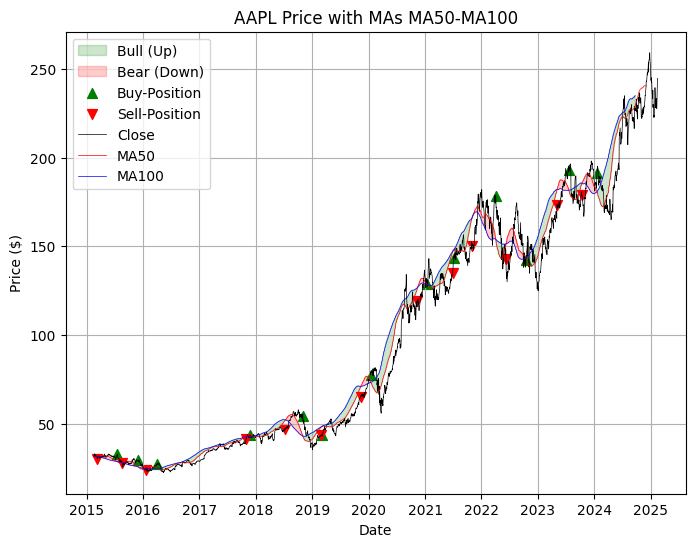

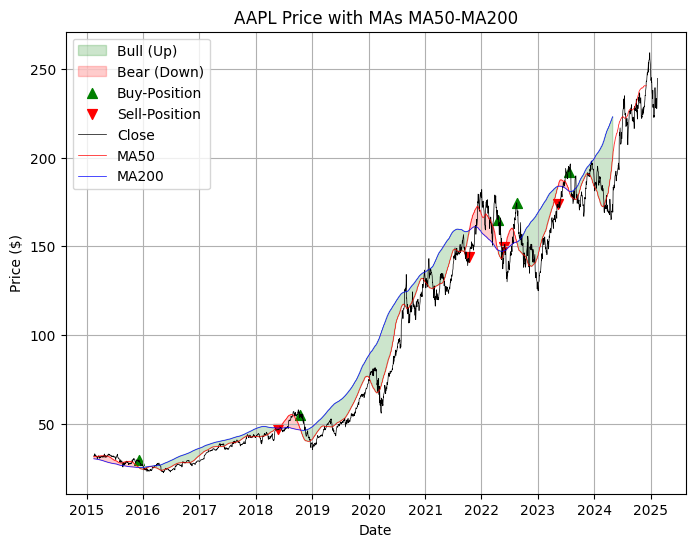

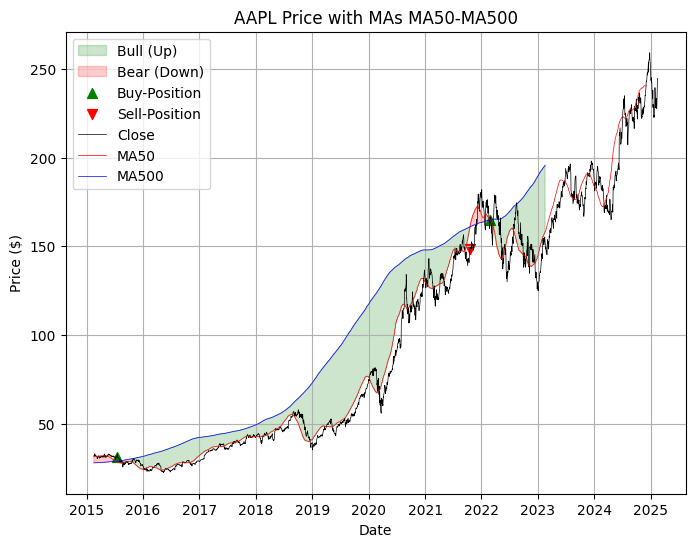

In [110]:
fast_periods = [5, 10, 30, 50]
slow_periods = [100, 200, 500]

generateMultipleMASignal(df=df ,fast_periods=fast_periods, slow_periods=slow_periods, size=(8, 6))

In [111]:
df

,Date,Close,Volume,Open,High,Low,MA50,MA200,Buy,Sell,MA5,MA100,MA500,MA10,MA30
0,2025-02-14,244.6000,40896230,241.2500,245.5500,240.9900,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
2,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
3,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
4,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000,NaN,NaN,False,False,236.65400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150,31.774800,30.395892,False,False,32.64174,31.832548,28.185767,32.32087,31.675917
2512,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125,31.778776,30.408974,False,False,32.69350,31.839236,28.183005,32.39325,31.693793
2513,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825,31.776276,30.425537,False,False,32.59526,31.846336,28.180585,32.44425,31.719877
2514,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625,31.794102,30.441080,False,False,32.59152,31.853974,28.178882,32.44863,31.757087


## Back test the strategy

In [112]:
from aFunctions import *

In [113]:
df_AAPL = prepData(pd.read_csv("AAPL.csv"))
df_AAPL

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


In [114]:
# print test log result
test_log = strategyTest(df=df_AAPL, slow=5, fast=100)
test_log

,Order_Date,Action,Balance $,Share,Share Price,Net
0,2015-02-16,Init,100.00,0.00,31.8725,100.00
1,2015-07-27,BUY,0.00,3.25,30.7725,100.01
2,2015-10-30,SELL,98.30,0.00,30.2475,98.30
3,2015-11-13,BUY,0.00,3.41,28.8000,98.21
4,2015-11-20,SELL,101.62,0.00,29.8000,101.62
5,2015-12-15,BUY,0.00,3.63,27.9850,101.59
6,2016-03-23,SELL,96.63,0.00,26.6200,96.63
7,2016-04-28,BUY,0.00,3.96,24.4025,96.63
8,2016-07-29,SELL,103.15,0.00,26.0475,103.15
9,2016-11-16,BUY,0.00,3.87,26.6750,103.23


In [115]:
# try extract result
test_log.iloc[-1]
# print(test_log.iloc[-1]["Net"])

Order_Date     2025-02-14 00:00:00
Action                       Final
Balance $                   139.92
Share                          0.0
Share Price                 241.25
Net                         139.92
Name: 53, dtype: object

## Back test multiple Parameters

In [116]:
# stores record in dataframe
# fast - slow - result
# fast start 0 end 100
# slow start 10 end 500

In [117]:
df = prepData(pd.read_csv("AAPL.csv"))
test_log = strategyTest(df=df, slow=5, fast=100)
test_log

,Order_Date,Action,Balance $,Share,Share Price,Net
0,2015-02-16,Init,100.00,0.00,31.8725,100.00
1,2015-07-27,BUY,0.00,3.25,30.7725,100.01
2,2015-10-30,SELL,98.30,0.00,30.2475,98.30
3,2015-11-13,BUY,0.00,3.41,28.8000,98.21
4,2015-11-20,SELL,101.62,0.00,29.8000,101.62
5,2015-12-15,BUY,0.00,3.63,27.9850,101.59
6,2016-03-23,SELL,96.63,0.00,26.6200,96.63
7,2016-04-28,BUY,0.00,3.96,24.4025,96.63
8,2016-07-29,SELL,103.15,0.00,26.0475,103.15
9,2016-11-16,BUY,0.00,3.87,26.6750,103.23


In [ ]:

# Available function
# prepData()
# generateMASignal()
# testStrategy()

import warnings
from pandas.errors import PerformanceWarning

warnings.simplefilter(action='ignore', category=PerformanceWarning)

df = prepData(pd.read_csv("AAPL.csv"))

records = []
fasts = list(range(5, 101, 5))
slows = list(range(100, 501, 50))

# print(strategyTest(df=df, slow=5, fast=100))

for fast in fasts:
    result = []  # Reset log

    for slow in slows:
        print(f"fast: {fast}, slow: {slow}")
        
        result = strategyTest(df=df, slow=slow, fast=fast)

        # Calculation
        init_investment = result.iloc[0]["Balance $"]
        final_value = result.iloc[-1]["Net"]
        pct_change = (final_value - init_investment) / init_investment
        net = result.iloc[-1]["Net"]
        exe_order = len(result) - 2
        # print(init_investment)
        # print(final_value)
        print(result)

        # Store data in a list
        records.append([fast, slow, net, pct_change, exe_order])

# Convert the list to a DataFrame once (efficient)
test_log = pd.DataFrame(records, columns=["Fast", "Slow", "Net", "Result%", "#Order"])

   Order_Date Action  Balance $  Share  Share Price     Net
0  2015-02-16   Init     100.00   0.00      31.8725  100.00
1  2015-07-27    BUY       0.00   3.25      30.7725  100.01
2  2015-10-30   SELL      98.30   0.00      30.2475   98.30
3  2015-11-13    BUY       0.00   3.41      28.8000   98.21
4  2015-11-20   SELL     101.62   0.00      29.8000  101.62
5  2015-12-15    BUY       0.00   3.63      27.9850  101.59
6  2016-03-23   SELL      96.63   0.00      26.6200   96.63
7  2016-04-28    BUY       0.00   3.96      24.4025   96.63
8  2016-07-29   SELL     103.15   0.00      26.0475  103.15
9  2016-11-16    BUY       0.00   3.87      26.6750  103.23
10 2016-11-17   SELL     106.24   0.00      27.4525  106.24
11 2016-12-06    BUY       0.00   3.88      27.3750  106.22
12 2016-12-08   SELL     107.53   0.00      27.7150  107.53
13 2017-07-03    BUY       0.00   2.97      36.2200  107.57
14 2017-07-13   SELL     108.03   0.00      36.3750  108.03
15 2017-09-26    BUY       0.00   2.85  

In [119]:
# len(test_log)
test_log

,Fast,Slow,Net,Result%,#Order
0,5,100,525.93,4.2593,53
1,5,150,461.22,3.6122,47
2,5,200,511.17,4.1117,27
3,5,250,586.02,4.8602,15
4,5,300,473.58,3.7358,17
...,...,...,...,...,...
175,100,300,556.90,4.5690,7
176,100,350,525.25,4.2525,5
177,100,400,511.29,4.1129,7
178,100,450,463.65,3.6365,5
